In [1]:
import os
import pickle

import numpy as np
from matplotlib import pyplot as plt

In [2]:
mse_list = [[] for _ in range(100)]

seeds = [i for i in range(1001, 1196)] + [i for i in range(1201, 1301)]

for seed_number in seeds:
    dir = f'simulation/seed_{seed_number}'

    dir_list = os.listdir(dir)
    dir_list.sort()

    for num_clients in dir_list:
        val = os.listdir(f'{dir}/{num_clients}')
        val.sort()

        avr = 0

        for client in val:
            with open(f'{dir}/{num_clients}/{client}', 'rb') as f:
                data = pickle.load(f)

            avr += data[0]['test_loss'][-1]

        mse_list[int(num_clients.split('_')[1]) - 1].append(avr / len(val))

In [3]:
l_mean = [np.mean(i) if len(i) != 0 else None for i in mse_list]
l_median = [np.median(i) if len(i) != 0 else None for i in mse_list]

In [4]:
xs = np.arange(1, 101)

series_mean = np.array(l_mean).astype(float)
series_median = np.array(l_median).astype(float)

smask = np.isfinite(series_mean)

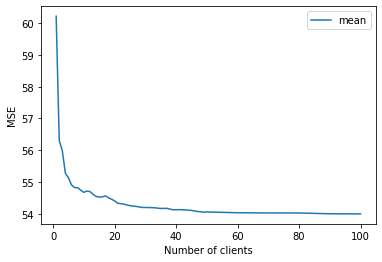

In [5]:
plt.plot(xs[smask], series_mean[smask])
# plt.plot(xs[smask], series_median[smask])

plt.legend(['mean'])
plt.xlabel('Number of clients')
plt.ylabel('MSE')

plt.show()